
# TP 03

{dorian.magnin, noemien.kocher}@master.hes-so.ch

## Exercice 1

a) Après une petite modif, le code est correct. Les graphiques montrent que le résultat n'est pas mauvais. Il est cependant étonnant que un des paramêtre ne semble pas converger!

La méthode implément le Batch.


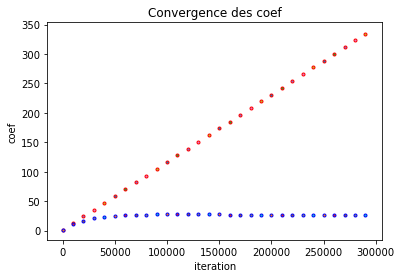

1,1:  25.5913538609
1,0:  346.063744028


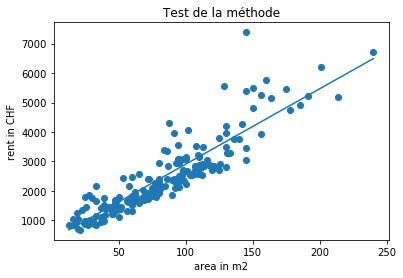

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x = dataset['area'].values
y = dataset['rent'].values

X = np.matrix( [np.ones(len(x)), x] ).T


def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.matrix(np.ones(D))  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
#        print("h: ", h)
#        print("y: ", y)
        loss = h-y - np.ones(N)                  #N dimension
        gradient = X_trans.dot(loss.T) * (1.0/N) 
        #print("Dim gradient: ", gradient.shape[0], gradient.shape[1])
        theta = theta - learning_rate * (1.0/N) * gradient # tht: 1x2 grad: 2x1
        if i%10000 == 0:
            plt.scatter(i, theta[1,0], marker='.', edgecolors='r')
            plt.scatter(i, theta[1,1], marker='.', edgecolors='b')
        
    return theta


factors = gradientDescent(X, y, 0.000001, 300000)
plt.title("Convergence des coef")
plt.xlabel("iteration")
plt.ylabel("coef")
plt.show()

print("1,1: ", factors[1,1])
print("1,0: ", factors[1,0])
h = np.poly1d([factors[1,1], factors[1,0]])

xUnseen = np.linspace(np.min(x), np.max(x))
yHat = h(xUnseen)
plt.scatter(x, y)
plt.plot(xUnseen, yHat)
plt.title("Test de la méthode")
plt.xlabel("area in m2")
plt.ylabel(("rent in CHF"))
plt.show()

b) effectivement, ça ne converge pas vraiment...

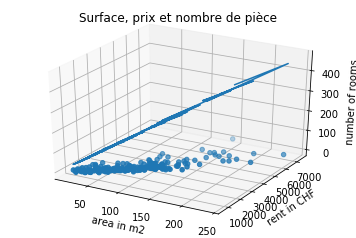

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x1 = dataset['area'].values
x2 = dataset['room'].values
y = dataset['rent'].values

X = np.matrix( [np.ones(len(x)), x1, x2] ).T


def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.matrix(np.ones(D))  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y - np.ones(N)                  #N dimension
        gradient = X_trans.dot(loss.T) * (1.0/N) 
        theta = theta - learning_rate * (1.0/N) * gradient # tht: 1x2 grad: 2x1
        
    return theta

coefs = gradientDescent(X, y, 0.000005, 10000)

z = coefs[2,0] + coefs[2,1]*x1 + coefs[2,2]*x2

h = np.poly1d([coefs[2,2], coefs[2,1], coefs[2,0]])

xUnseen = np.linspace(np.min(x1), np.max(x1))
yHat = h(xUnseen)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y, x2)
ax.set_title("Surface, prix et nombre de pièce")
ax.set_xlabel("area in m2")
ax.set_ylabel(("rent in CHF"))
ax.set_zlabel("number of rooms")

ax.plot_wireframe(x1, y, z)

plt.show()

c) On voit que la normalisation des données offre une meilleure convergence:

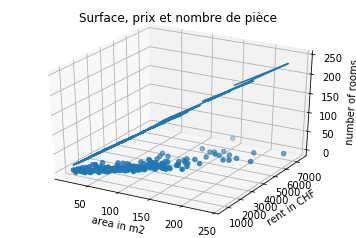

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv
from mpl_toolkits.mplot3d import Axes3D

dataset = pd.read_excel('lausanne-appart.xlsx',
                        parse_cols=2,
                        header=1,
                        names=['area', 'room', 'rent'])

x1 = dataset['area'].values
x2 = dataset['room'].values
y = dataset['rent'].values

max = np.maximum(x1, x2)
min = np.minimum(x1, x2)
average = np.average(x1 + x2)
variance = np.var(x1 + x2)

x1_norm = (x1-average) / variance
x2_norm = (x2-average) / variance
#x1_norm = (x1-min)/(max-min)
#x2_norm = (x2-min)/(max-min)

X = np.matrix( [np.ones(len(x1)), x1_norm, x2_norm] ).T


def hypothesis(theta,X):  #theta = 1xD, X = DxN, output 1xN
    return np.dot(theta,X)

def gradientDescent(X,y,learning_rate,num_epoch,verbose=False):
    N = X.shape[0]      # number of sample
    D = X.shape[1]      # number of dimensions
    theta = np.matrix(np.ones(D))  # init thetas to some values
    X_trans = X.transpose() # X_trans is DxN
    
    for i in range(0,num_epoch):
        h = hypothesis(theta,X_trans)  #N dimension
        loss = h-y - np.ones(N)                  #N dimension
        gradient = X_trans.dot(loss.T) * (1.0/N) 
        theta = theta - learning_rate * (1.0/N) * gradient # tht: 1x2 grad: 2x1
        
    return theta

#meshgrid
#z = intrecept ...
#plot_wireframe ...
coefs = gradientDescent(X, y, 0.000005, 10000)

z = coefs[2,0] + coefs[2,1]*x1 + coefs[2,2]*x2

h = np.poly1d([coefs[2,2], coefs[2,1], coefs[2,0]])

xUnseen = np.linspace(np.min(x1), np.max(x1))
yHat = h(xUnseen)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y, x2)
ax.set_title("Surface, prix et nombre de pièce")
ax.set_xlabel("area in m2")
ax.set_ylabel(("rent in CHF"))
ax.set_zlabel("number of rooms")

ax.plot_wireframe(x1, y, z)

plt.show()

# Exercice 2

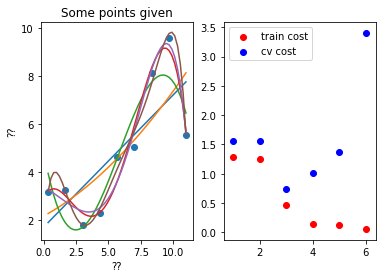

In [8]:
train_set = pd.read_excel('overfitting.xlsx',
                        header=1,
                        names=['x', 'y'], sheetname='train_set')
train_x = train_set['x'].values
train_y = train_set['y'].values

cv_set = pd.read_excel('overfitting.xlsx',
                        header=1,
                        names=['x', 'y'], sheetname='cv_set')
cv_x = cv_set['x'].values
cv_y = cv_set['y'].values

#print("train set:", train_set)
#print("cv set: ", cv_set)


def cost(x, y, h):
    sum = 0
    for i in range(0, len(x)):
        sum = sum + ( h(x[i]) - y[i] )**2
    return sum * (1.0/ (2*len(x) ))

xUnseen = np.linspace(np.min(train_x), np.max(train_x))
train_costs = []
cv_costs = []
times = []

f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(train_x, train_y)

for i in range(1, 7):
    # On train set
    polynomCoef = np.polyfit(train_x, train_y, deg=i)
    h = np.poly1d(polynomCoef)
    yHat = h(xUnseen)
    ax1.plot(xUnseen, yHat)
    train_costs.append(cost(train_x, train_y, h))
    cv_costs.append(cost(cv_x, cv_y, h))
    times.append(i)

ax2.scatter(times, train_costs, label="train cost", color="r")
ax2.scatter(times, cv_costs, label="cv cost", color="b")
ax2.legend()
ax1.set_title("Some points given")
ax1.set_xlabel("??")
ax1.set_ylabel("??")
plt.show()

a) ok

b) ok

c) ok

d) ok

e) ok

f) Selon notre analyse, le meilleur modèle est celui de degré 3, car c'est à ce niveau-là que le coût sur le cross-validation set augmente.
Illustration:

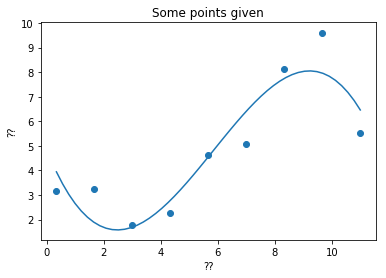

In [10]:
plt.scatter(train_x, train_y)


# On train set
polynomCoef = np.polyfit(train_x, train_y, deg=3)
h = np.poly1d(polynomCoef)
yHat = h(xUnseen)
plt.plot(xUnseen, yHat)

plt.title("Some points given")
plt.xlabel("??")
plt.ylabel("??")
plt.show()